In [2]:
import pandas as pd
import numpy as np
from plotnine import *

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/Simpson2.csv")
df

,department,result,gender,count
0,A,fail,female,0
1,A,fail,male,100
2,A,pass,female,1
3,A,pass,male,900
4,B,fail,female,400
5,B,fail,male,1
6,B,pass,female,600
7,B,pass,male,1


In [24]:
df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

,gender,count2
0,female,1001
1,male,1002


In [34]:
df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()

,gender,result,count
0,female,fail,400
1,female,pass,601
2,male,fail,101
3,male,pass,901


In [28]:
dt1_ = df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')

In [29]:
dt1_

,gender,result,count,count2,rate
0,female,fail,400,1001,0.399600
1,female,pass,601,1001,0.600400
2,male,fail,101,1002,0.100798
3,male,pass,901,1002,0.899202


### 학교 전체 합격률 비교

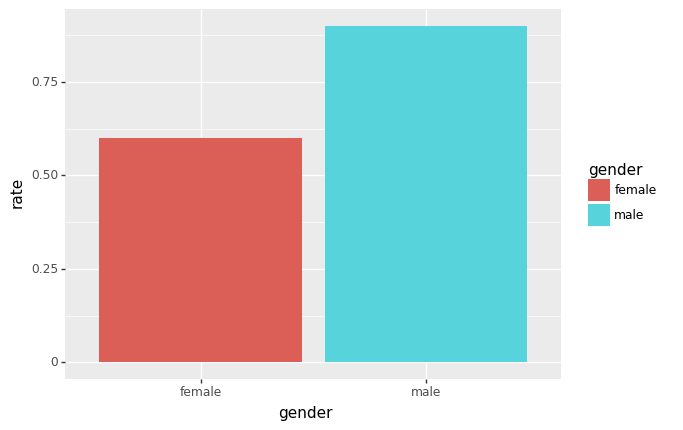

<ggplot: (144431048527)>

In [31]:
ggplot(dt1_.query('result == "pass"')) + geom_col(aes(x='gender', y='rate',fill='gender'))

### 학과별 합격률 시각화

In [35]:
df

,department,result,gender,count
0,A,fail,female,0
1,A,fail,male,100
2,A,pass,female,1
3,A,pass,male,900
4,B,fail,female,400
5,B,fail,male,1
6,B,pass,female,600
7,B,pass,male,1


In [38]:
df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

,department,gender,count2
0,A,female,1
1,A,male,1000
2,B,female,1000
3,B,male,2


In [44]:
data2 = df.merge(df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')
data2

,department,result,gender,count,count2,rate
0,A,fail,female,0,1,0.0
1,A,pass,female,1,1,1.0
2,A,fail,male,100,1000,0.1
3,A,pass,male,900,1000,0.9
4,B,fail,female,400,1000,0.4
5,B,pass,female,600,1000,0.6
6,B,fail,male,1,2,0.5
7,B,pass,male,1,2,0.5


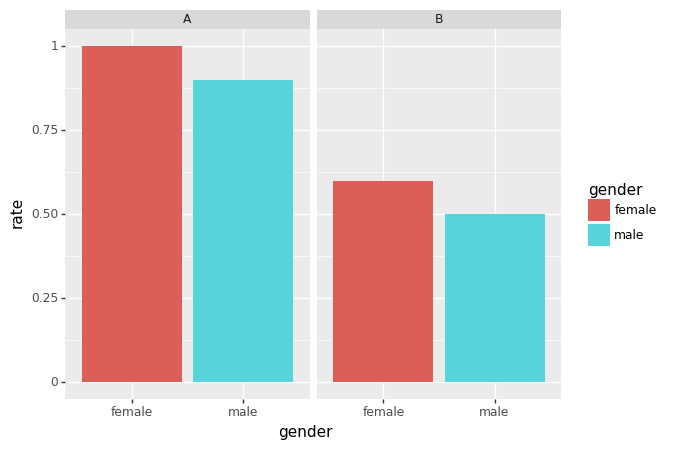

<ggplot: (144438219415)>

In [49]:
ggplot(data2.query('result=="pass"')) + geom_col(aes(x='gender',y='rate',fill='gender'))\
+ facet_wrap('department')

### 학과별 지원자 수 시각화

In [56]:
data3 = df.groupby(['gender','department']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)
data3

,gender,department,count2
0,female,A,1
1,female,B,1000
2,male,A,1000
3,male,B,2


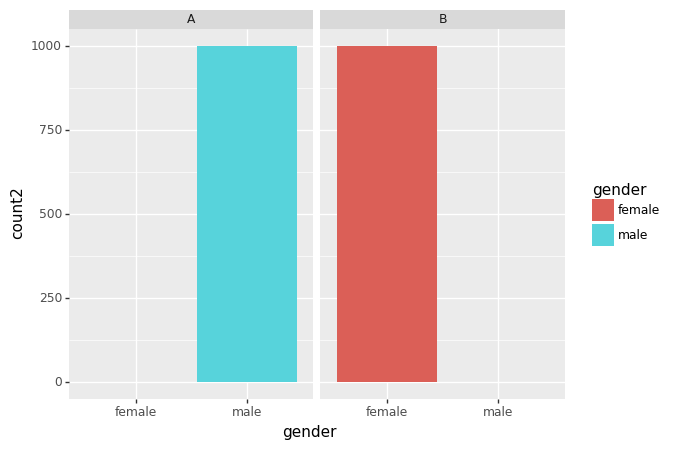

<ggplot: (144440776695)>

In [60]:
ggplot(data3) + geom_col(aes(x='gender' , y= 'count2' ,fill='gender')) + facet_wrap('department')